In [197]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# read argb image
img = cv2.imread('img/drone/90_45_0.png', cv2.IMREAD_UNCHANGED)


In [143]:
def find_bound(img):
    alpha = img[..., 3]
        
    rows_with_content = np.any(alpha!=0, axis=1)
    cols_with_content = np.any(alpha!=0, axis=0)

    x_indices = np.nonzero(cols_with_content)[0]
    y_indices = np.nonzero(rows_with_content)[0]
     
    x1, x2 = x_indices[0], x_indices[-1]
    y1, y2 = y_indices[0], y_indices[-1]
    

    return y1, x1, y2, x2

def motion_blur(image, degree=12, angle=45):

    M = cv2.getRotationMatrix2D((degree / 2, degree / 2), angle, 1)
    motion_blur_kernel = np.diag(np.ones(degree))
    motion_blur_kernel = cv2.warpAffine(motion_blur_kernel, M, (degree, degree))

    motion_blur_kernel = motion_blur_kernel / degree
    blurred = cv2.filter2D(image, -1, motion_blur_kernel)

    # convert to uint8
    cv2.normalize(blurred, blurred, 0, 255, cv2.NORM_MINMAX)
    blurred = np.array(blurred, dtype=np.uint8)
    return blurred


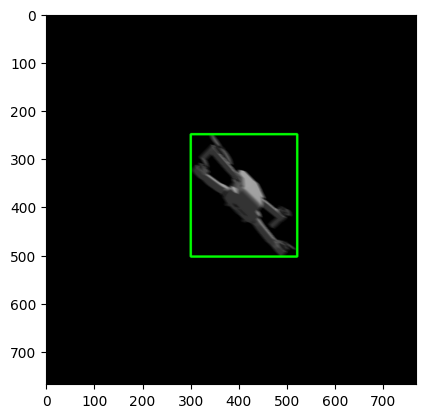

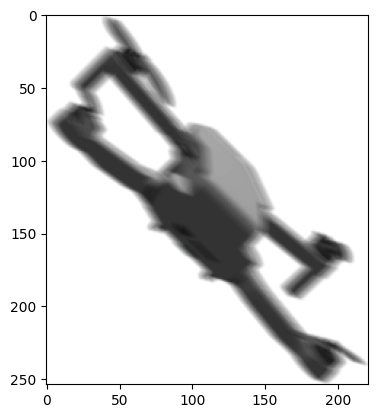

In [198]:
blur_img = motion_blur(img.copy(), degree=10, angle=30)
y1, x1, y2, x2 = find_bound(blur_img)
cut_img = blur_img[y1:y2, x1:x2]
box_img = cv2.rectangle(cv2.cvtColor(blur_img, cv2.COLOR_RGBA2RGB), (x1, y1), (x2, y2), (0, 255, 0), 3)
plt.imshow(box_img)
plt.show()
plt.imshow(cut_img)
plt.show()

(177, 154, 3) (177, 154, 4)


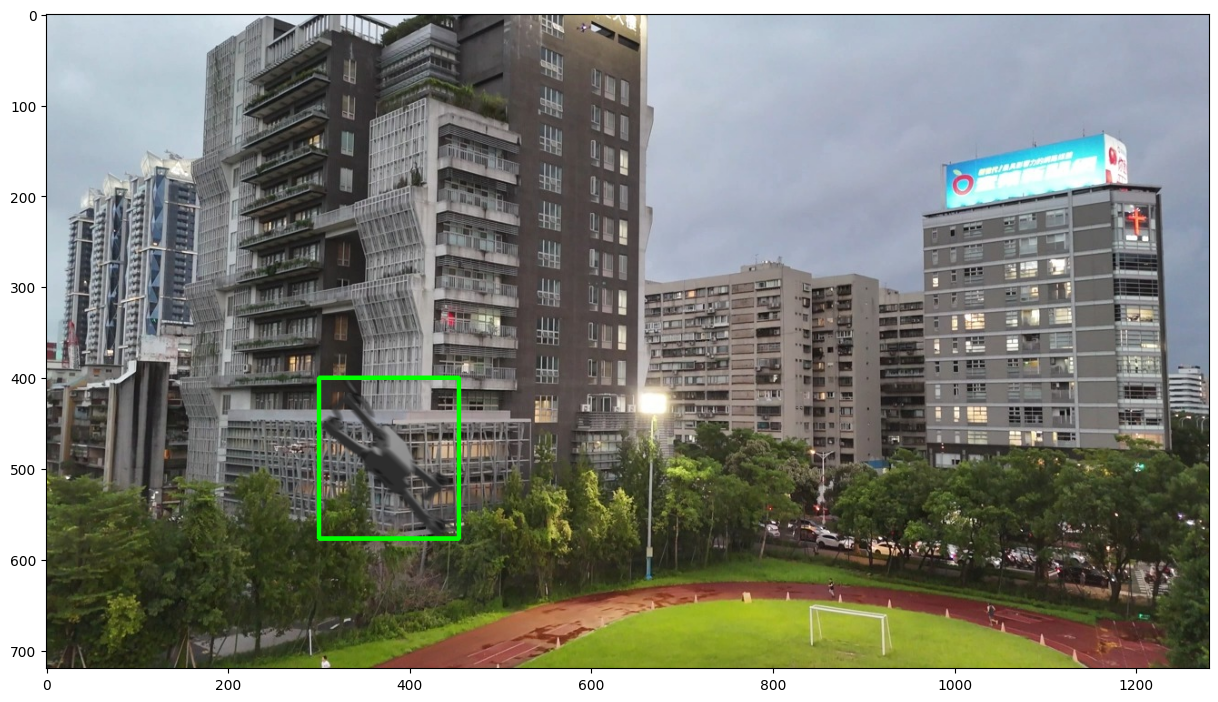

In [199]:
scene_img = cv2.imread('scene1.jpg')
scene_img = cv2.cvtColor(scene_img, cv2.COLOR_BGR2RGB)

cut_img = cv2.resize(cut_img, (int(cut_img.shape[1] * 0.7), int(cut_img.shape[0] * 0.7)))

cut_alpha = cut_img[:, :, 3] / 255
cut_rgb = cut_img[:, :, :3] * 0.9

x1 = 300
y1 = 400
x2 = x1 + cut_img.shape[1]
y2 = y1 + cut_img.shape[0]

bg_region = scene_img[y1:y2, x1:x2]
print(bg_region.shape, cut_img.shape)
bg_region = (cut_rgb * cut_alpha[:, :, None] + bg_region * (1 - cut_alpha[:, :, None])).astype(np.uint8)

scene_img[y1:y2, x1:x2] = bg_region
scene_img = cv2.rectangle(scene_img, (x1, y1), (x2, y2), (0, 255, 0), 3)
plt.figure(figsize=(15, 15))
plt.imshow(scene_img)

(32, 94, 3) (32, 94, 4)


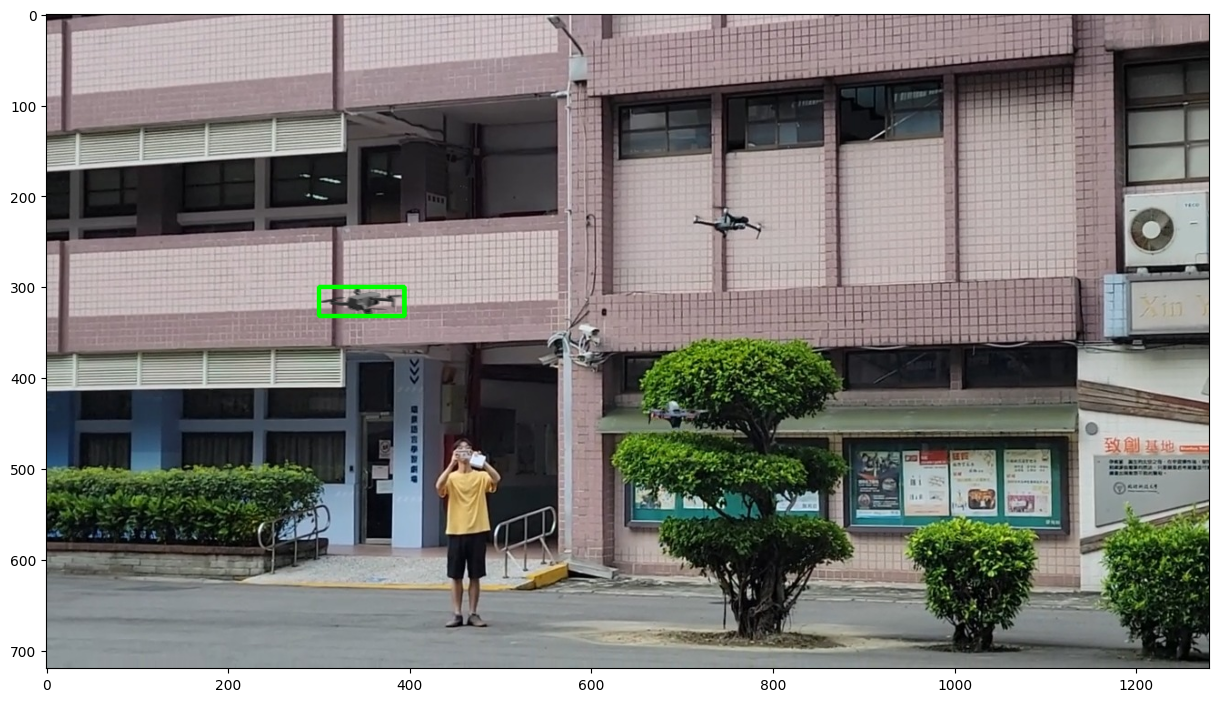

In [202]:
scene_img = cv2.imread('scene2.jpg')
scene_img = cv2.cvtColor(scene_img, cv2.COLOR_BGR2RGB)
img = cv2.imread('img/drone/90_0_315.png', cv2.IMREAD_UNCHANGED)

blur_img = motion_blur(img.copy(), degree=15, angle=30)
y1, x1, y2, x2 = find_bound(blur_img)
cut_img = blur_img[y1:y2, x1:x2]

cut_img = cv2.resize(cut_img, (int(cut_img.shape[1] * 0.25), int(cut_img.shape[0] * 0.25)))

cut_alpha = cut_img[:, :, 3] / 255
cut_rgb = cut_img[:, :, :3] * 0.9

x1 = 300
y1 = 300
x2 = x1 + cut_img.shape[1]
y2 = y1 + cut_img.shape[0]

bg_region = scene_img[y1:y2, x1:x2]
print(bg_region.shape, cut_img.shape)
bg_region = (cut_rgb * cut_alpha[:, :, None] + bg_region * (1 - cut_alpha[:, :, None])).astype(np.uint8)

scene_img[y1:y2, x1:x2] = bg_region
scene_img = cv2.rectangle(scene_img, (x1, y1), (x2, y2), (0, 255, 0), 3)
plt.figure(figsize=(15, 15))
plt.imshow(scene_img)